In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from enum import Enum

/home/allan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Problem 0 (Setup)

In [2]:
def show_image(image):
    print("The shape of the given image is {}.".format(image.shape))
    print("The data type of the given image is {}.".format(image.dtype))
    # cv2.imwrite('{}'.format(image_name),image)
    cv2.imshow('image',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def show_two_image(image1,image2):
    print("The shape of the given image is {}.".format(image1.shape))
    print("The shape of the given image is {}.".format(image2.shape))
    print("The data type of the given image is {}.".format(image1.dtype))
    print("The data type of the given image is {}.".format(image2.dtype))
    cv2.imshow('image1',image1)
    cv2.imshow('image2',image2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def image_save(image, image_name):
    cv2.imwrite('{}'.format(image_name),image)
    
# def generate_image_histogram_value(image): 
#     result_count = []
#     value_range = []
#     for i in range(256):
#         result_count.append(np.sum(image == i))
#         value_range.append(i)
#     return result_count, value_range

def generate_image_histogram(image: np.ndarray, image_name): # TODO: write the result graph into a specific folder
    plt.hist(image.flatten(),range=(0,270),bins=256)
    plt.title('Histogram of {}'.format(image_name))
    plt.xlabel('Pixel Value')
    plt.ylabel('Pixel Number')
    # plt.savefig('{}_hist.png'.format(image_name))
    plt.show()

def change_to_grayscale(arr): #input is constraint to a ndarray or a list
    temp = [[] for i in range(len(arr))]
    for i in range(0,len(arr)):
        for j in range(0,len(arr[i])):
            grayscale = 0.2989*arr[i][j][2] + 0.587*arr[i][j][1] + 0.114*arr[i][j][0]
            temp[i].append(grayscale)
    result = np.array(temp).astype(np.uint8)
    return result

In [3]:
int(-0.7)

0

In [4]:
def sqrt_image(image):
    temp = [[] for i in range(len(image))]
    for i in range(0,len(image)):
        for j in range(0,len(image[i])):
            temp[i].append(math.sqrt(image[i][j]))
    return np.array(temp)
sobel_column = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print(sobel_column)
sobel_row = np.array([[1,0,1],[2,0,2],[1,0,1]])
sqrt_row = sqrt_image(sobel_row)
print(sqrt_row)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]
[[1.         0.         1.        ]
 [1.41421356 0.         1.41421356]
 [1.         0.         1.        ]]


In [5]:
# Implementation of Gaussian filter(low pass filter).
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)
def gaussian_filter(image,ker_s,sigma): #TODO: add filledvalue argument to decide what value to fill in when boundary is 'fill'
    kernel = gaussian_kernel(ker_s,sigma)
    result = signal.convolve2d(image,kernel,mode='same',boundary='symm')
    return result


# Problem 1

In [6]:
class Direction(Enum):
    Horizon = 1
    Vertical = 2
    Slash = 3
    BackSlash = 4

In [7]:
image1 = change_to_grayscale(cv2.imread("/home/allan/hw2_sample_images-1/hw2_sample_images/sample1.png"))
image1.shape

(600, 600)

In [8]:
# Implement Sobel edge detection
def sqrt_image(image):
    temp = [[] for i in range(len(image))]
    for i in range(len(image)):
        for j in range(len(image[i])):
            temp[i].append(math.sqrt(image[i][j]))
    return np.array(temp)

def sobel_edge_detection(image,k):
    sobel_column = np.array([[1,k,1],[0,0,0],[-1,-k,-1]])
    sobel_row = np.array([[-1,0,1],[-k,0,k],[-1,0,1]])
    temp_column = signal.convolve2d(image,sobel_column,mode='same',boundary='fill',fillvalue=0)
    temp_row = signal.convolve2d(image,sobel_row,mode='same',boundary='fill',fillvalue=0)
    temp1 = temp_column**2+temp_row**2
    result2 = [[] for i in range(len(temp_column))]
    for i in range(len(temp_column)):
        for j in range(len(temp_column[i])):
            temp = math.degrees(math.atan(temp_column[i][j]/temp_row[i][j]))
            if 0<=temp<=22.5 or 337.5<=temp<=360 or 157.5<=temp<=202.5:
                result2[i].append(Direction.Horizon.value)
            elif 22.5<=temp<=67.5 or 202.5<=temp<=247.5:
                result2[i].append(Direction.Slash.value)
            elif 67.5<=temp<=112.5 or 247.5<=temp<=292.5:
                result2[i].append(Direction.Vertical.value)
            else:
                result2[i].append(Direction.BackSlash.value)
            # result2.append(temp)
    result1 = (1/4)*sqrt_image(temp1)
    return np.array(result1).astype(np.uint8),result2

def select_gradient(image,t):
    temp = [[] for i in range(len(image))]
    for i in range(len(image)):
        for j in range(len(image[i])):
            if image[i][j] > t:
                temp[i].append(255)
            else:
                temp[i].append(0)
    return np.array(temp).astype(np.uint8)

/tmp/ipykernel_105753/286184866.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  temp = math.degrees(math.atan(temp_column[i][j]/temp_row[i][j]))
/tmp/ipykernel_105753/286184866.py:18: RuntimeWarning: invalid value encountered in scalar divide
  temp = math.degrees(math.atan(temp_column[i][j]/temp_row[i][j]))


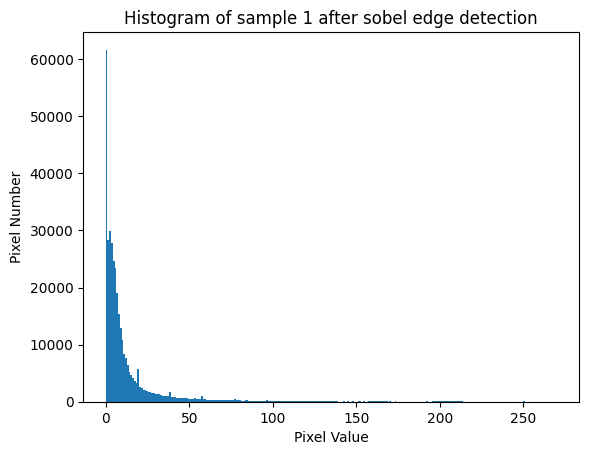

In [9]:
sobel_image1, image1_dir= sobel_edge_detection(image1,2)
image_save(sobel_image1,'result1.png')
generate_image_histogram(sobel_image1,'sample 1 after sobel edge detection')

In [10]:
result1_100 = select_gradient(sobel_image1,100)
result1_50 = select_gradient(sobel_image1,50)
result1_25 = select_gradient(sobel_image1,25)
result1_35 = select_gradient(sobel_image1,35) #final parameter

image_save(result1_100,'result1_100.png')
image_save(result1_50,'result1_50.png')
image_save(result1_25,'result1_25.png')
image_save(result1_35,'result1_35.png') #final parameter

In [11]:
class Pixel(Enum):
    Edge = 2
    Candidate = 1
    Nonedge = 0

In [12]:
# Implement Canny edge detection
# Sobel detection and gaussian filter is implemented
def non_maximal_supression(image,dir):
    temp_image = []
    for i in range(len(image)):
        temp_list = []
        for j in range(len(image[i])):
            if i==0 or j==0 or i==len(image)-1 or j==len(image[0])-1:
                temp_list.append(0)
                continue
            if dir[i][j] == Direction.Horizon.value:
                if image[i][j]>image[i][j-1] and image[i][j]>image[i][j+1]:
                    temp_list.append(image[i][j])
                else:
                    temp_list.append(0)
            elif dir[i][j] == Direction.Vertical.value:
                if image[i][j]>image[i-1][j] and image[i][j]>image[i+1][j]:
                    temp_list.append(image[i][j])
                else:
                    temp_list.append(0)
            elif dir[i][j] == Direction.Slash.value:
                if image[i][j]>image[i+1][j-1] and image[i][j]>image[i-1][j+1]:
                    temp_list.append(image[i][j])
                else:
                    temp_list.append(0)
            else:
                if image[i][j]>image[i-1][j-1] and image[i][j]>image[i+1][j+1]:
                    temp_list.append(image[i][j])
                else:
                    temp_list.append(0)
        temp_image.append(temp_list)
    return np.array(temp_image).astype(np.uint8)
    # if i==0 or j==0 or i==255 or j==255:
    #     return image
    # if dir == Direction.Horizon.value:
    #     if image[i][j]>image[i][j-1] and image[i][j]>image[i][j+1]:
    #         return image
    #     else:
    #         image[i][j] = 0
    #         return image

def hysteretic_thresholding(supressed_image,high,low):
    edge_list = []
    mark_image = [[] for i in range(len(supressed_image))]
    for i in range(len(supressed_image)):
        for j in range(len(supressed_image[i])):
            if supressed_image[i][j]>=high:
                edge_list.append((i,j))
                mark_image[i].append(Pixel.Edge.value)
                supressed_image[i][j] = 255
            elif high>supressed_image[i][j]>=low:
                mark_image[i].append(Pixel.Candidate.value)
            else:
                mark_image[i].append(Pixel.Nonedge.value)
    return supressed_image, mark_image, edge_list

def connect_candidate(image,marked,edge_list:list):
    while len(edge_list)!=0:
        temp_list_i = []
        temp_list_j = []
        index = edge_list.pop()
        if index[0] == 0:
            temp_list_i.append(index[0])
            temp_list_i.append(index[0]+1)
        elif index[0] == len(image):
            temp_list_i.append(index[0]-1)
            temp_list_i.append(index[0])
        else:
            temp_list_i.append(index[0]-1)
            temp_list_i.append(index[0])
            temp_list_i.append(index[0]+1)
        if index[1] == 0:
            temp_list_j.append(index[1])
            temp_list_j.append(index[1]+1)
        elif index[1] == len(image[0]):
            temp_list_j.append(index[1]-1)
            temp_list_j.append(index[1])
        else:
            temp_list_j.append(index[1]-1)
            temp_list_j.append(index[1])
            temp_list_j.append(index[1]+1)
        for a in temp_list_i:
            for b in temp_list_j:
                if marked[a][b] == Pixel.Candidate.value:
                    image[a][b] = 255
                    marked[a][b] = Pixel.Edge.value
                    edge_list.append((a,b))
                else:
                    pass
    return np.array(image).astype(np.uint8)

def canny_detection(image,k): # argument is the same as sobel detection
    filtered_image = gaussian_filter(image,3,2)
    

/tmp/ipykernel_105753/286184866.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  temp = math.degrees(math.atan(temp_column[i][j]/temp_row[i][j]))
/tmp/ipykernel_105753/286184866.py:18: RuntimeWarning: invalid value encountered in scalar divide
  temp = math.degrees(math.atan(temp_column[i][j]/temp_row[i][j]))


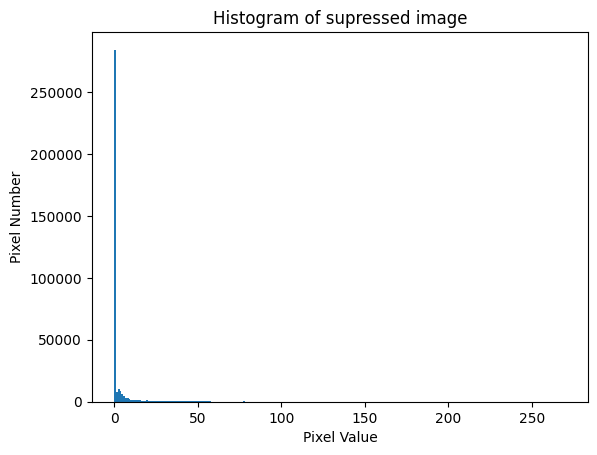

In [13]:
image_sobel, image_dir= sobel_edge_detection(gaussian_filter(image1,3,2),2)
# image_sobel.shape
# print(len(image_dir))
supressed_image = non_maximal_supression(image_sobel,image_dir)
generate_image_histogram(supressed_image,'supressed image')
# selected_image,image_mark,edge_list = hysteretic_thresholding(supressed_image,25,10)
# connected_image = connect_candidate(selected_image,image_mark,edge_list)


In [14]:
selected_image_40_20,image_mark_40_20,edge_list_40_20 = hysteretic_thresholding(supressed_image,40,20)
selected_image_25_10,image_mark_25_10,edge_list_25_10 = hysteretic_thresholding(supressed_image,25,10)
image_save(selected_image_40_20,'result3_40_20.png')
image_save(selected_image_25_10,'result3_25_10.png') #final parameter


In [15]:
connected_image = connect_candidate(selected_image_25_10,image_mark_25_10,edge_list_25_10)
image_save(connected_image,"result3.png")


In [16]:
# Implement Laplacian of Gaussian edge detection
def laplacian_gaussian(image):
    operator = np.array([[-1/8,-1/8,-1/8],[-1/8,1,-1/8],[-1/8,-1/8,-1/8]])
    temp_image = gaussian_filter(image,3,2)
    result = signal.convolve2d(temp_image,operator,mode='same',boundary='symm')
    return np.array(result).astype(np.uint8)

In [17]:
log_image = laplacian_gaussian(image1)
image_save(log_image,'result4.png')

In [18]:
# Implement edge crispening
def edge_crispening(image,ker_s,sigma,c):# c 3/5--5/6 0.6-0.83
    temp_image1 = image
    temp_image2 = gaussian_filter(image,ker_s,sigma)
    temp1 = temp_image1 * (c/(2*c-1))
    temp2 = temp_image2 * ((1-c)/(2*c-1))
    result = temp1 - temp2
    return np.array(result).astype(np.uint8)

In [19]:
image2 = change_to_grayscale(cv2.imread("/home/allan/hw2_sample_images-1/hw2_sample_images/sample2.png"))
image2_cris_0_6 = edge_crispening(image2,3,2,0.6) # final
image2_cris_0_7 = edge_crispening(image2,3,2,0.7)
image2_cris_0_8 = edge_crispening(image2,3,2,0.8)
image_save(image2_cris_0_6,'result5_0_6.png')
image_save(image2_cris_0_7,'result5_0_7.png')
image_save(image2_cris_0_8,'result5_0_8.png')

# Problem 2

In [20]:
def distortion(x,y,k1=0,k2=0,p1=0,p2=0,s1=0,s2=0):
    r_square = x**2 + y**2
    k = 1 + k1*r_square + k2*(r_square**2)
    u = x*k + 2*p2*x*y + p1*(r_square + 2*(x**2)) + s1*r_square
    v = y*k + p2*(r_square + 2*(y**2)) + 2*p1*x*y + s2*r_square
    return int(u), int(v)

def get_rotate(sigma):
    temp = np.array([[np.cos(sigma),-np.sin(sigma),0],[np.sin(sigma),np.cos(sigma),0],[0,0,1]])
    return temp
def get_translation(x_off,y_off):
    temp = np.array([[1,0,x_off],[0,1,y_off],[0,0,1]])
    return temp
def get_scale(mag):
    temp = np.array([[mag,0,0],[0,mag,0],[0,0,1]])
    return temp
def transform(x,y,sigma=0,x_offset=0,y_offset=0,mag=1):
    operator_rotate = np.linalg.inv(get_rotate(sigma))
    operator_translation = np.linalg.inv(get_translation(x_offset,y_offset))
    operator_scale = np.linalg.inv(get_scale(mag))
    temp = np.dot(operator_translation,operator_scale)
    operator = np.dot(temp,operator_rotate)
    target = np.array([x,y,1])
    result = np.dot(operator,target)
    return int(result[0]),int(result[1])
    


In [21]:
temp_image = [[255 for j in range(600)]for i in range(600)]
print(np.array(temp_image).astype(np.uint8))

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [22]:
 
def barrel_distortion(image,x_or,y_or):
    # set up the x and y maps as float32
    h = len(image)
    w = len(image[0])
    map_x = np.zeros((h, w), np.float32)
    map_y = np.zeros((h, w), np.float32)

    scale_x = 1
    scale_y = 1
    center_x = x_or
    center_y = y_or
    radius = w/2
    #amount = -0.75   # negative values produce pincushion
    amount = 0.75   # positive values produce barrel

    # create map with the barrel pincushion distortion formula
    for y in range(h):
        delta_y = scale_y * (y - center_y)
        for x in range(w):
            # determine if pixel is within an ellipse
            delta_x = scale_x * (x - center_x)
            distance = delta_x * delta_x + delta_y * delta_y
            if distance >= (radius * radius):
                map_x[y, x] = x
                map_y[y, x] = y
            else:
                factor = 1.0
                if distance > 0.0:
                    factor = math.pow(math.sin(math.pi * math.sqrt(distance) / radius / 2), amount)
                map_x[y, x] = factor * delta_x / scale_x + center_x
                map_y[y, x] = factor * delta_y / scale_y + center_y
                

    # do the remap
    dst = cv2.remap(image, map_x, map_y, cv2.INTER_LINEAR)
    return dst


In [23]:
def traslation(image,x_offset,y_offset):
    temp_image = np.copy(image)
    for i in range(len(temp_image)):
        for j in range(len(temp_image[i])):
            u,v = transform(i,j,x_offset=x_offset,y_offset=y_offset)
            if len(image)>u>=0 and len(image[0])>v>=0:
                temp_image[u][v] = image[i][j]
    return temp_image
def scaling(image,mag):
    temp_image = np.copy(image)
    for i in range(len(temp_image)):
        for j in range(len(temp_image[i])):
            u,v = transform(i,j,mag=mag)
            if len(image)>u>=0 and len(image[0])>v>=0:
                temp_image[u][v] = image[i][j]
    return temp_image
def rotation(image,sigma):
    temp_image = np.copy(image)
    for i in range(len(temp_image)):
        for j in range(len(temp_image[i])):
            u,v = transform(i,j,sigma=sigma)
            if len(image)>u>=0 and len(image[0])>v>=0:
                temp_image[u][v] = image[i][j]
    return temp_image

In [50]:
image3 = change_to_grayscale(cv2.imread("/home/allan/hw2_sample_images-1/hw2_sample_images/sample3.png"))
image3_distorted = barrel_distortion(image3,280,270)
# image_save(image3_distorted,'test_distortion.png')
# show_two_image(image3,image3_distorted)
image3_translated = traslation(image3_distorted,10,-110)
image3_rotated = rotation(image3_translated,0.33*np.pi)
show_image(image3_rotated)

The shape of the given image is (600, 600).
The data type of the given image is uint8.


In [51]:
image_save(image3_rotated,'result8_rotate.png')


In [25]:
def dance_distortion(image,scale,phi):
    temp_image = list(image)
    for i in range(len(temp_image)):
        move = int(math.cos(i*phi)*scale)
        if move<0:
            for count in range(-move):
                temp_image[i] = np.delete(temp_image[i],[-1])
                temp_image[i] = np.insert(temp_image[i],0,255)
        elif move > 0:
            for count in range(move):
                temp_image[i] = np.delete(temp_image[i],[0])
                temp_image[i] = np.insert(temp_image[i],-1,255)
        else:
            continue
    return np.array(temp_image).astype(np.uint8)


In [39]:
image4 = change_to_grayscale(cv2.imread("/home/allan/hw2_sample_images-1/hw2_sample_images/sample5.png"))
image4_distorted = dance_distortion(image4,15,0.03*np.pi)
show_image(image4_distorted)

The shape of the given image is (600, 800).
The data type of the given image is uint8.


In [40]:
image_save(image4_distorted,'result9_third.png')